In [1]:
# 속도가 일정하지 않은 경우, 위치기반 속도 추정

import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy import io

np.random.seed(0)

In [2]:
input_mat = io.loadmat('../data/SonarAlt.mat')

In [3]:
def get_sonar(i):
    
    """ 소나 측정 """
    z= input_mat['sonarAlt'][0][i]
    return z

In [4]:
def kalman_filter(z_meas, x_esti, P):
    """ 칼만 알고리즘 """
   
    # (1) 예측
    x_pred = A @ x_esti
    P_pred = A @ P @ A.T + Q
    
    # (2) 칼만 이득
    K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)
    
    # (3) 추정
    x_esti = x_pred + K @ (z_meas - H @ x_pred)
    
    # (4) 오차 공분산
    P = P_pred - K @ H @ P_pred
    
    return x_esti, P

In [5]:
# Input parameters.
n_samples = 500
time_end = 10

In [8]:
# 시스템 모델을 위한 초기값 설정.
# 행렬: A, H, Q, R, P_0
# 벡터: x_0

dt = time_end / n_samples
A = np.array([[1, dt],
              [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[1, 0],
              [0, 3]])
R = np.array([[10]])

# 추정을 위한 초기값 설정.
x_0 = np.array([0, 20])  # 위치 및 속도
P_0 = 5 * np.eye(2)

In [9]:
time = np.arange(0, time_end, dt)
z_pos_meas_save = np.zeros(n_samples)
x_pos_esti_save = np.zeros(n_samples)
x_vel_esti_save = np.zeros(n_samples)

In [10]:
x_esti, P = None, None
for i in range(n_samples):
    z_meas = get_sonar(i)
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    z_pos_meas_save[i] = z_meas
    x_pos_esti_save[i] = x_esti[0]
    x_vel_esti_save[i] = x_esti[1]

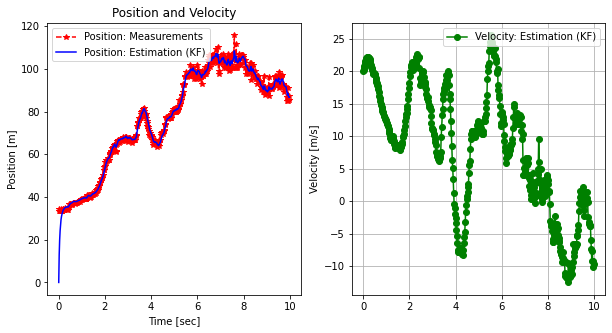

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(time, z_pos_meas_save, 'r*--', label='Position: Measurements')
plt.plot(time, x_pos_esti_save, 'b-', label='Position: Estimation (KF)')
plt.legend(loc='upper left')
plt.title('Position and Velocity')
plt.xlabel('Time [sec]')
plt.ylabel('Position [m]')

plt.subplot(1, 2, 2)
plt.plot(time, x_vel_esti_save, 'go-', label='Velocity: Estimation (KF)')
plt.legend(loc='upper right')
plt.ylabel('Velocity [m/s]')
plt.grid(True)
plt.savefig('jpg/sonar_pos2vel_kf.jpg')
plt.show()